In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [2]:
def create_waveform(num_points):
    # create train samples
    data1 = 1 * np.cos(np.arange(0, num_points))
    data2 = 2 * np.cos(np.arange(0, num_points))
    data3 = 3 * np.cos(np.arange(0, num_points))
    data4 = 4 * np.cos(np.arange(0, num_points))
    
    # Create varying amplitudes
    amp1 = np.ones(num_points)
    amp2 = 4 + np.zeros(num_points)
    amp3 = 2 * np.ones(num_points)
    amp4 = 0.5 + np.zeros(num_points)
    
    data = np.array([data1, data2, data3, data4]).reshape(num_points * 4, 1)
    amplitude = np.array([[amp1, amp2, amp3, amp4]]).reshape(num_points * 4, 1)
    
    return data, amplitude

In [3]:
# Draw the output using the network
def draw_output(net, num_points_test):
    data_test, amplitude_test = create_waveform(num_points_test)
    output_test = net.sim(data_test)
    plt.plot(amplitude_test.reshape(num_points_test * 4))
    plt.plot(output_test.reshape(num_points_test * 4))

In [4]:
# Get data
num_points = 30
data, amplitude = create_waveform(num_points)

In [5]:
# Create network with 2 layers
net = nl.net.newelm([[-2,2]], [10,1], [nl.trans.TanSig(), nl.trans.PureLin()])

In [6]:
# Set initialised function and init
net.layers[0].initf = nl.init.InitRand([-0.1,0.1], 'wb')
net.layers[1].initf = nl.init.InitRand([-0.1,0.1], 'wb')
net.init()

In [7]:
# Train the recurrent neural network
error = net.train(data, amplitude, epochs=1000, show=100, goal=0.01)

Epoch: 100; Error: 1.5332027345150192;
Epoch: 200; Error: 1.9882538244424113;
Epoch: 300; Error: 0.11156996404582355;
Epoch: 400; Error: 0.168910581166707;
Epoch: 500; Error: 0.1138109058693009;
Epoch: 600; Error: 0.1388855927818117;
Epoch: 700; Error: 0.053795192875121585;
Epoch: 800; Error: 0.040251463799186024;
Epoch: 900; Error: 0.03256273575498154;
Epoch: 1000; Error: 0.030098705426491852;
The maximum number of train epochs is reached


In [8]:
# Compute output from network
output = net.sim(data)

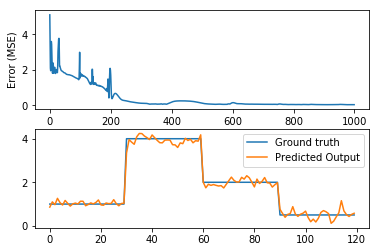

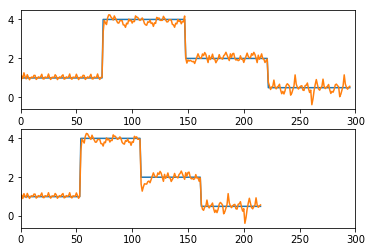

In [9]:
# Plot training results
plt.subplot(211)
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')

plt.subplot(212)
plt.plot(amplitude.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Ground truth', 'Predicted Output'])

# Testing on unknown data at multiple scales
plt.figure()

plt.subplot(211)
draw_output(net, 74)
plt.xlim([0, 300])

plt.subplot(212)
draw_output(net, 54)
plt.xlim([0, 300])

plt.show()